In [151]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import datetime as dt

mpl.rcParams['savefig.dpi'] = 100 
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams.update({'font.size': 40})

%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

import matplotlib.dates as mdates

In [152]:
with open("../results/trips-time-series.txt") as f:
    lines = f.readlines()

In [153]:
tuples = [line.strip() for line in lines]

In [154]:
taxi_dates = [x[1:].split(",")[0][1:-1] for x in tuples]
rides = [float(x[:-1].split(",")[1]) for x in tuples]

In [155]:
x = [dt.datetime.strptime(d, '%Y/%m').date() for d in taxi_dates]
y = range(len(x))

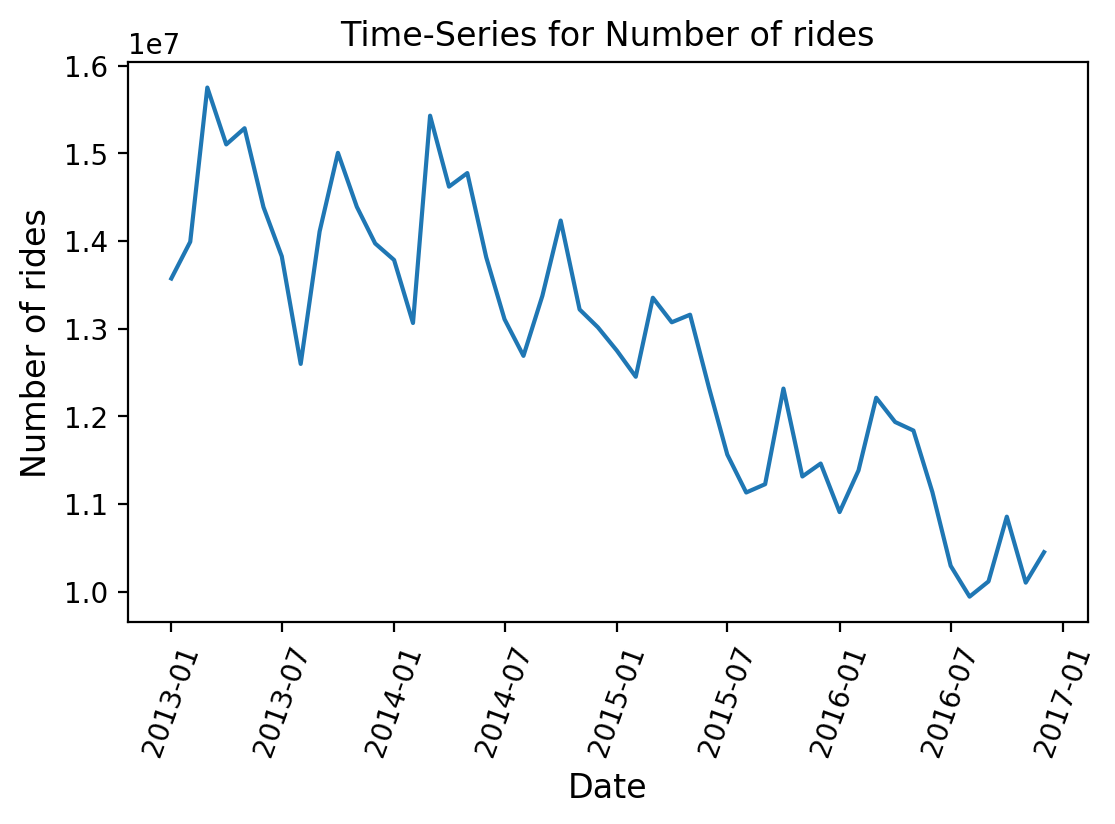

In [156]:
fig = mpl.pyplot.gcf()

ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title("Time-Series for Number of rides")

plt.plot(x, rides)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70 )

plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of rides", fontsize=12)

plt.savefig("time-series-rides.jpg",bbox_inches="tight")

In [157]:
with open("../results/trips-without-outliers.txt") as f:
    lines = f.readlines()

In [158]:
tuples = [line.strip() for line in lines]

In [159]:
taxi_dates = [x[1:].split(",")[0][1:-1] for x in tuples]
miles = [float(x[:-1].split(",")[1]) for x in tuples]

In [160]:
avg_miles = [a / b for a, b in zip(miles, rides)]
x = [dt.datetime.strptime(d, '%Y/%m').date() for d in taxi_dates]

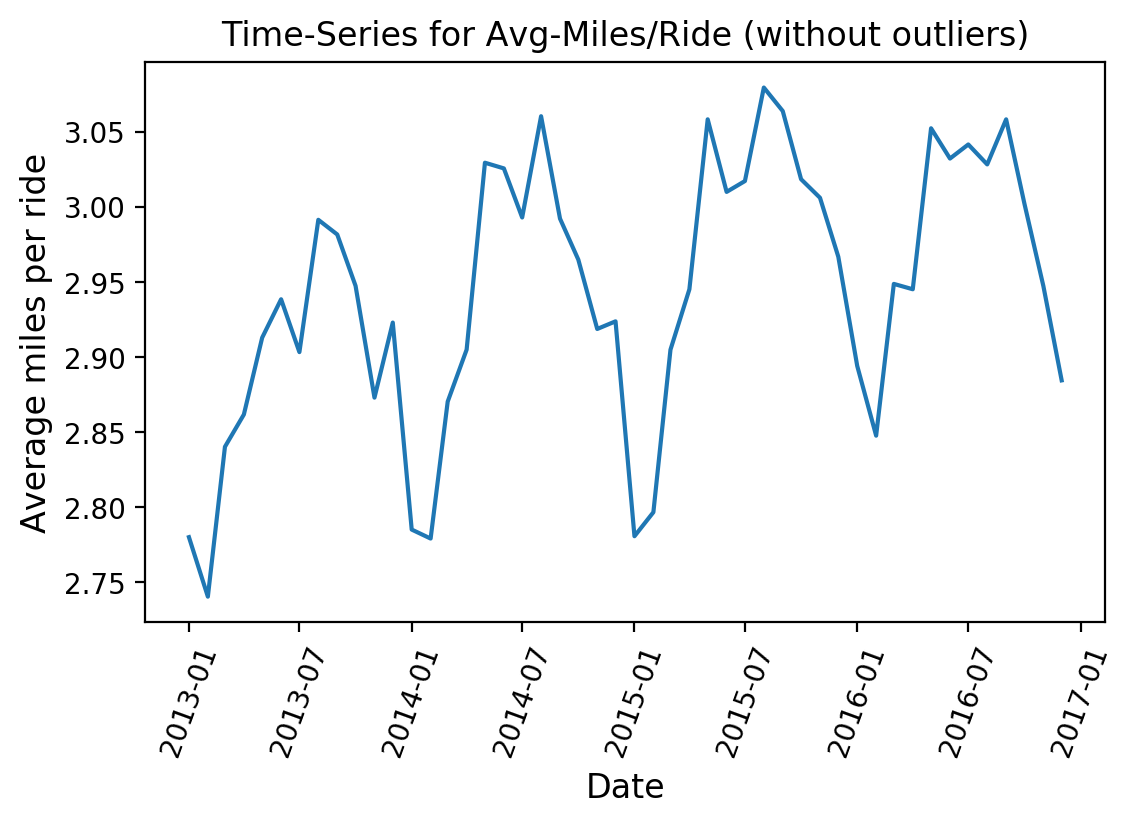

In [161]:
fig = mpl.pyplot.gcf()

ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title("Time-Series for Avg-Miles/Ride (without outliers)")

plt.plot(x, avg_miles)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70 )

plt.xlabel("Date", fontsize=12)
plt.ylabel("Average miles per ride", fontsize=12)

plt.savefig("time-series-avg-miles-without-outliers.jpg",bbox_inches="tight")

In [162]:
len(rides)

48

In [163]:
avg_miles

[2.7801453624497534,
 2.740544387718963,
 2.8402902834348955,
 2.8617780237010377,
 2.9129261895072105,
 2.938476336099495,
 2.9033049196171974,
 2.9913657514593543,
 2.9816037739126107,
 2.947433147638665,
 2.8730131978765967,
 2.922971607569338,
 2.785188617559207,
 2.7792089225861467,
 2.8703859677846917,
 2.904946092893441,
 3.0293719023793186,
 3.0255885613503057,
 2.992910887191086,
 3.0603173440802074,
 2.9921615728589064,
 2.964865641542553,
 2.9187115992052486,
 2.923799034759163,
 2.780758752892221,
 2.796735157508658,
 2.904904352726394,
 2.9451178404119585,
 3.0582519157925465,
 3.0099473684851246,
 3.0171706033055123,
 3.079402112467045,
 3.0637461580394163,
 3.018397188970543,
 3.00603972570243,
 2.966793612326405,
 2.8941221394832732,
 2.847698082304894,
 2.9487127137999134,
 2.9451457542094595,
 3.052297212781188,
 3.032140892122224,
 3.0415170466908465,
 3.0282396764197266,
 3.0582435153831886,
 3.002067470588064,
 2.9473124860424984,
 2.88449341819166]

In [164]:
for a, b in zip(taxi_dates, rides):
    print(a, b)

2013/01 13571249.0
2013/02 13990176.0
2013/03 15749228.0
2013/04 15100468.0
2013/05 15285049.0
2013/06 14385456.0
2013/07 13823840.0
2013/08 12597109.0
2013/09 14107693.0
2013/10 15004556.0
2013/11 14388451.0
2013/12 13971118.0
2014/01 13782492.0
2014/02 13063791.0
2014/03 15428127.0
2014/04 14618759.0
2014/05 14774041.0
2014/06 13813029.0
2014/07 13106365.0
2014/08 12688877.0
2014/09 13374016.0
2014/10 14232487.0
2014/11 13218216.0
2014/12 13014161.0
2015/01 12748986.0
2015/02 12450521.0
2015/03 13351609.0
2015/04 13071789.0
2015/05 13158262.0
2015/06 12324935.0
2015/07 11562783.0
2015/08 11130304.0
2015/09 11225063.0
2015/10 12315488.0
2015/11 11312676.0
2015/12 11460573.0
2016/01 10906858.0
2016/02 11382049.0
2016/03 12210952.0
2016/04 11934338.0
2016/05 11836853.0
2016/06 11135470.0
2016/07 10294080.0
2016/08 9942263.0
2016/09 10116018.0
2016/10 10854626.0
2016/11 10102128.0
2016/12 10449408.0


# Net Traffic

For this part, we're doing the analysis on rows with location IDs available (July to December 2016).

We want to find out which areas are "taxi importers" or "taxi exporters" based on whether people mainly pick up taxis (export) or drop off (import) at a given location throughout the day. We also differentiate based on weekends or weekdays.

In [165]:
import pandas as pd
columns = ['LocationID', 'is_weekend', 'hour', 'minute', 'in', 'out']
net_traffic = pd.read_csv('../net_traffic.csv', header=None, index_col=None)
net_traffic.columns = columns

In [166]:
locations = pd.read_csv('../taxi_zone_lookup.csv', index_col=None, dtype={
        'LocationID': int
    })

In [167]:
net_traffic_joined = pd.merge(net_traffic, locations, how='left', on='LocationID')
net_traffic_joined[6000:6010]

,LocationID,is_weekend,hour,minute,in,out,Borough,Zone,service_zone
6000,4,False,22,6,123,286,Manhattan,Alphabet City,Yellow Zone
6001,4,False,22,7,132,325,Manhattan,Alphabet City,Yellow Zone
6002,4,False,22,8,95,287,Manhattan,Alphabet City,Yellow Zone
6003,4,False,22,9,117,278,Manhattan,Alphabet City,Yellow Zone
6004,4,False,22,10,108,322,Manhattan,Alphabet City,Yellow Zone
6005,4,False,22,11,116,283,Manhattan,Alphabet City,Yellow Zone
6006,4,False,22,12,107,267,Manhattan,Alphabet City,Yellow Zone
6007,4,False,22,13,105,356,Manhattan,Alphabet City,Yellow Zone
6008,4,False,22,14,117,309,Manhattan,Alphabet City,Yellow Zone
6009,4,False,22,15,142,303,Manhattan,Alphabet City,Yellow Zone


In [168]:
import numpy as np

nt = net_traffic_joined
def get_line(zone, is_weekend=False):
    cond = ~nt['is_weekend']
    if is_weekend:
        cond = nt['is_weekend']
    cond = cond & (nt['Zone'] == zone)
    rows = nt[cond]
    assert len(rows) == (24 * 60)
    timeofday = (rows['hour'] * 60) + rows['minute']
    # Assumes data is already sorted by time of day.
    return timeofday, (rows['in'] - rows['out'])


[ 0.          0.26666667  0.53333333  0.8       ]


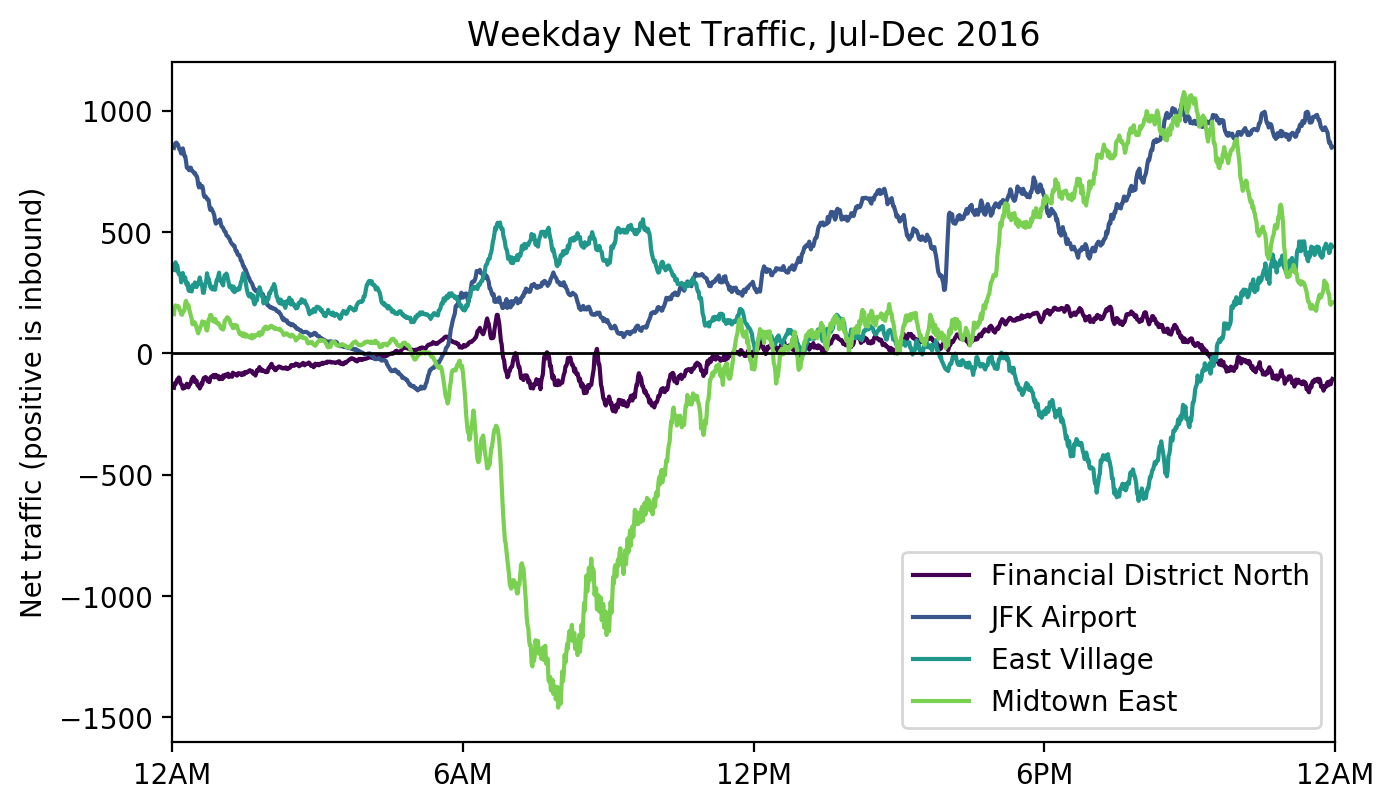

In [172]:
from matplotlib import cm

def common_settings():
    hours = [x * 60 for x in [0, 6, 12, 18, 24]]
    hour_labels = ['12AM', '6AM', '12PM', '6PM', '12AM']
    plt.xlim(0, 24)
    plt.xticks(hours, hour_labels)
    plt.ylabel('Net traffic (positive is inbound)')
    plt.axhline(y=0, linewidth=1, color='black')
    plt.ylim(-1600, 1200)

zones = [
    'Financial District North',
    'JFK Airport',
    'East Village',
    'Midtown East',
]

cm_subsection = np.linspace(0.0, 0.8, len(zones)) 
print(cm_subsection)
colors = [cm.viridis(x) for x in cm_subsection]

plt.figure(figsize=(7.5,4.5))
#plt.plot(fidi_n_timeofday, fidi_n_net)
for zone, color in zip(zones, colors):
    timeofday, net = get_line(zone)
    # 5 minute moving average
    plt.plot(timeofday,
             net.rolling(window=5, win_type='boxcar', center=True).mean(),
             label=zone, color=color)
    
plt.title('Weekday Net Traffic, Jul-Dec 2016')
plt.legend(loc='best')
common_settings()
plt.show()

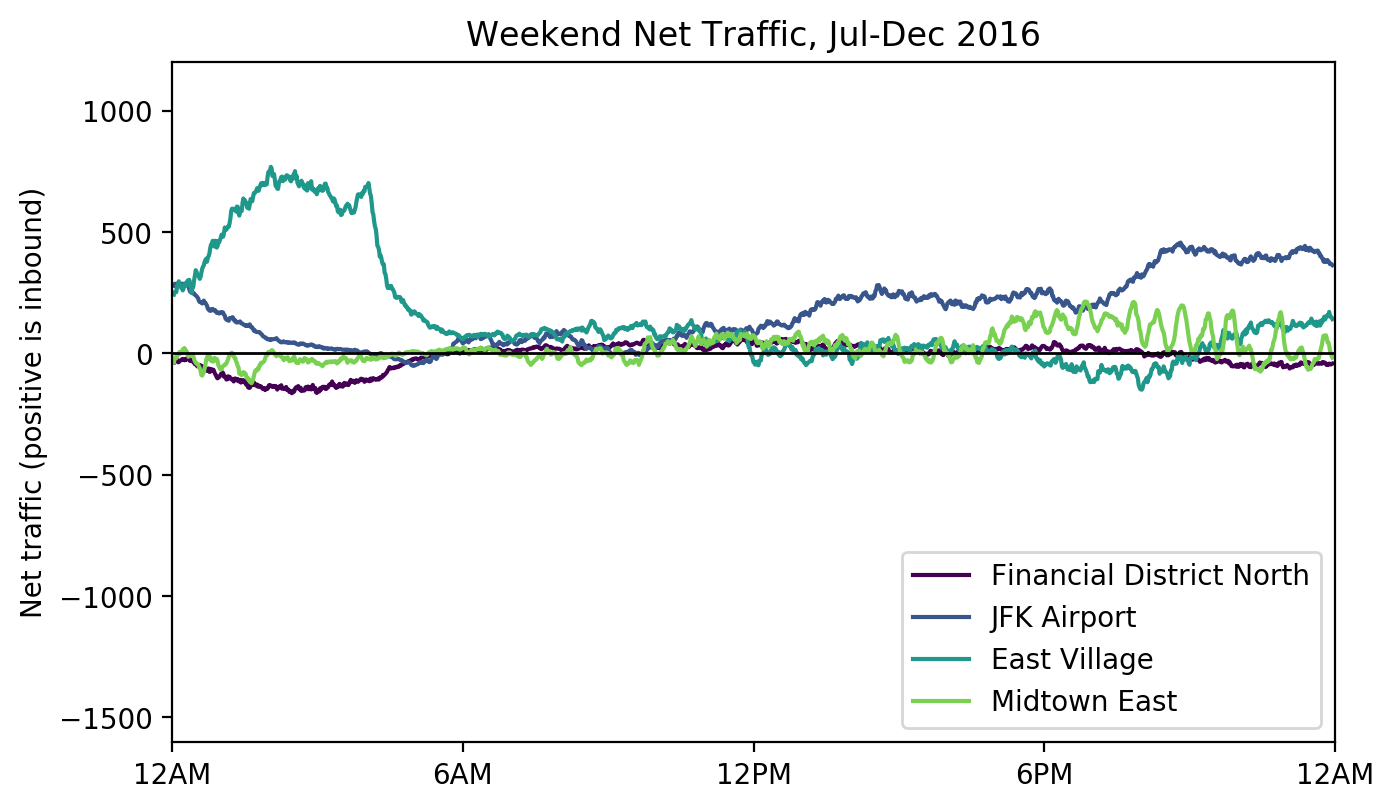

In [174]:
plt.figure(figsize=(7.5,4.5))
#plt.plot(fidi_n_timeofday, fidi_n_net)
for zone, color in zip(zones, colors):
    timeofday, net = get_line(zone, is_weekend=True)
    # 5 minute moving average
    plt.plot(timeofday,
             net.rolling(window=5, win_type='boxcar', center=True).mean(),
             label=zone, color=color)

plt.title('Weekend Net Traffic, Jul-Dec 2016')
plt.legend(loc='lower right')
common_settings()
plt.show()

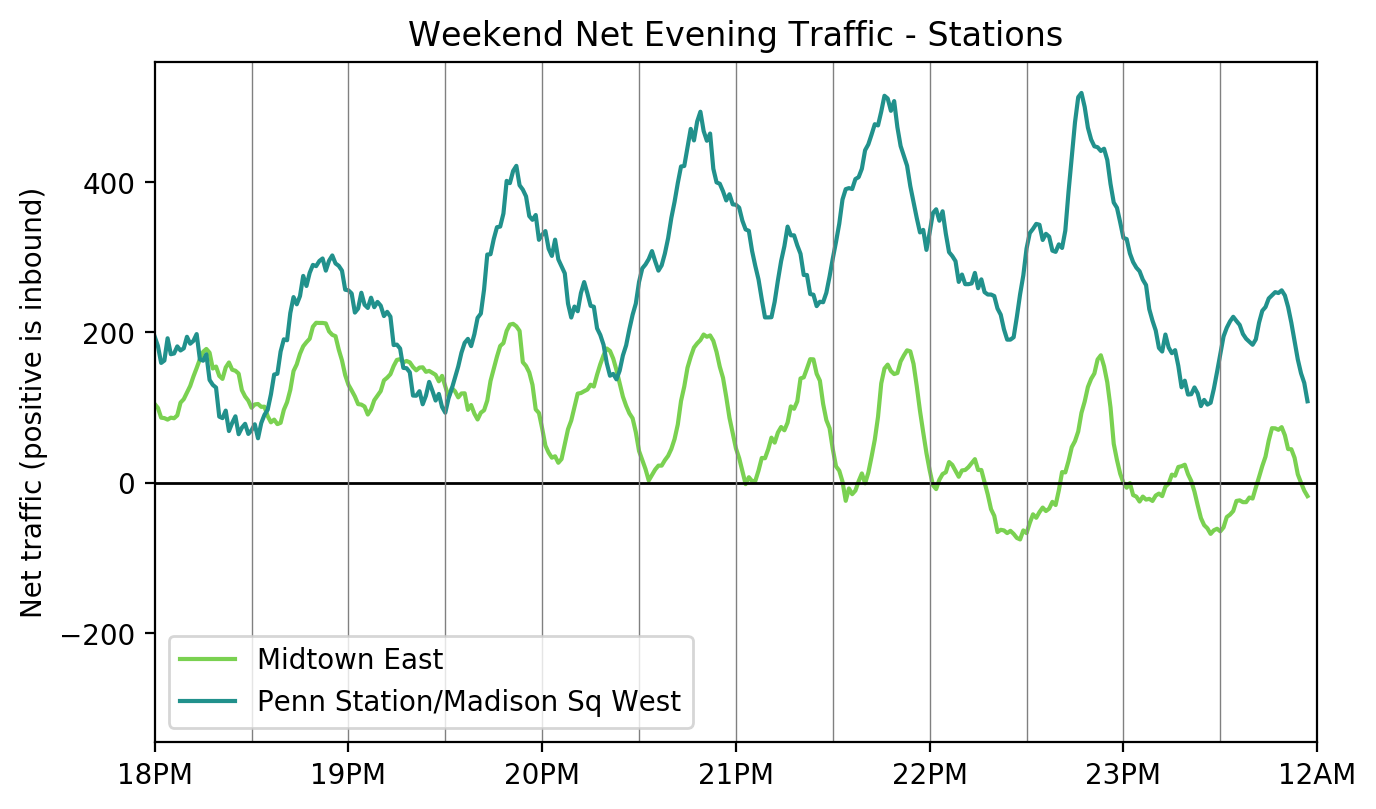

In [171]:
zones = [
    ('Midtown East', cm.viridis(0.8)),
    ('Penn Station/Madison Sq West', cm.viridis(0.5))
]

plt.figure(figsize=(7.5,4.5))
#plt.plot(fidi_n_timeofday, fidi_n_net)
for zone, color in zones:
    timeofday, net = get_line(zone, is_weekend=True)
    # 5 minute moving average
    plt.plot(timeofday,
             net.rolling(window=5, win_type='boxcar', center=True).mean(),
             label=zone, color=color)
    
hours = [x * 60 for x in range(18, 25)]
hour_labels = ['{0}PM'.format(x) for x in range(18, 24)] + ['12AM']
plt.xticks(hours, hour_labels)
plt.legend(loc='best')
plt.title('Weekend Net Evening Traffic - Stations')
plt.ylabel('Net traffic (positive is inbound)')
plt.axhline(y=0, linewidth=1, color='black')

times_00 = [(x, 0) for x in range(19, 24)]
times_30 = [(x, 30) for x in range(18, 24)]
time_idx = [h * 60 + m for h, m in times_00 + times_30]
for t in time_idx:
    plt.axvline(x=t, linewidth=0.5, color='grey')

plt.xlim(18*60, 24*60)
plt.show()